In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import datetime as dt
import re
from collections import Counter
import math
import warnings # Turn off warnings
warnings.filterwarnings('ignore')

# Imports

In [2]:
petition_df = pd.read_csv("~/data/sf-open-data/petitions-clean.csv") # 40749 rows
petition_df['Datetime'] = petition_df['Date'].apply(lambda x : dt.datetime.strptime(x, "%m/%d/%Y"))
petition_df['Timestamp'] = petition_df['Date'].apply(lambda x : mdates.datestr2num(x))

In [3]:
unemployment_df = pd.read_csv("~/data/stlouisfed/CASANF0URN.csv") # 352 rows
unemployment_df = unemployment_df.rename(columns = {"CASANF0URN": "Rate"})
unemployment_df['Datetime'] = unemployment_df['DATE'].apply(lambda x : dt.datetime.strptime(x, "%Y-%m-%d"))
unemployment_df = unemployment_df.set_index("Datetime").drop(columns = "DATE")

# Duplicate Entries

In [4]:
max(petition_df['Petition ID Len'])

78

In [5]:
petition_df[petition_df['Petition ID Len'] == 78]

,Date,Address,latlong,Zip Code,Neighborhood Number,Neighborhood Name,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Supervisor District,...,:@computed_region_p5aj_wyqh,:@computed_region_rxqg_mtj9,:@computed_region_yftq_j783,:@computed_region_bh8s_q3mv,Datetime,Timestamp,Latitude,Longitude,Petition ID List,Petition ID Len
8001,04/30/2015,600 Block Of Commercial Street,"(37.79417305070332, -122.4038888305787)",94111.0,6.0,Chinatown,104.0,6.0,3.0,3.0,...,1.0,10.0,3.0,28860.0,2015-04-30,735718.0,37.794173,-122.403889,"['T150888', 'T150831', 'T150842', 'T150821', '...",78


# Tenant vs Landlord

In [6]:
petition_df['Filing Party'].value_counts()

tenant      28184
landlord    12562
Name: Filing Party, dtype: int64

# Check Granularity of Data

In [10]:
# Get count data by using groupby
petition_day_count_df = petition_df[['Petition ID Len', 'Datetime']].groupby(pd.TimeGrouper("D", key="Datetime")).count()
petition_week_count_df = petition_df[['Petition ID Len', 'Datetime']].groupby(pd.TimeGrouper("W", key="Datetime")).count()
petition_month_count_df = petition_df[['Petition ID Len', 'Datetime']].groupby(pd.TimeGrouper("M", key="Datetime")).count()
petition_year_count_df = petition_df[['Petition ID Len', 'Datetime']].groupby(pd.TimeGrouper("Y", key="Datetime")).count()

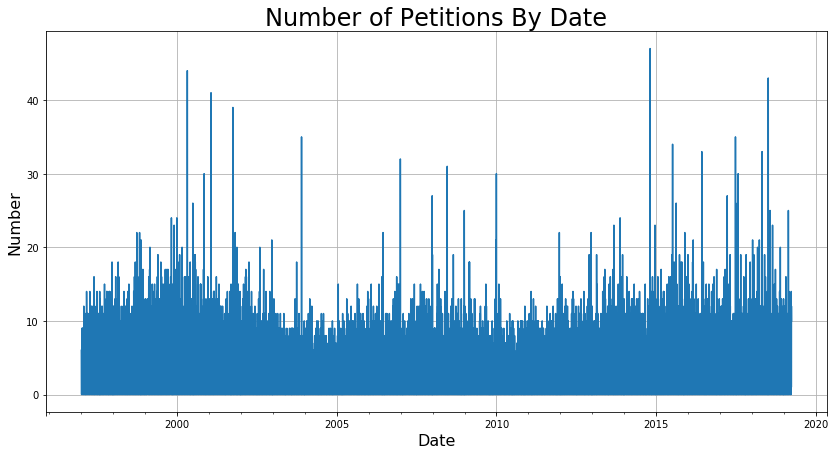

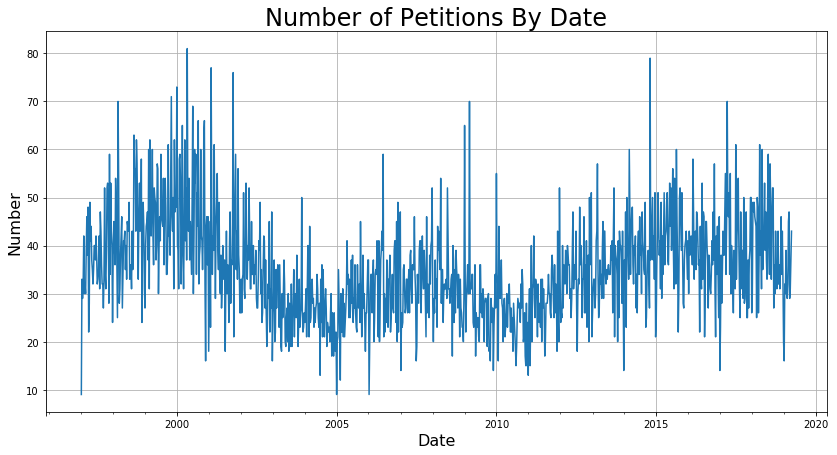

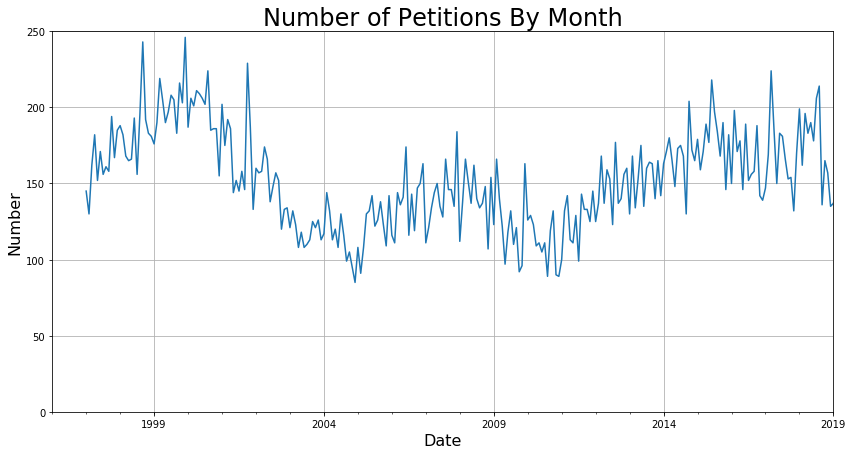

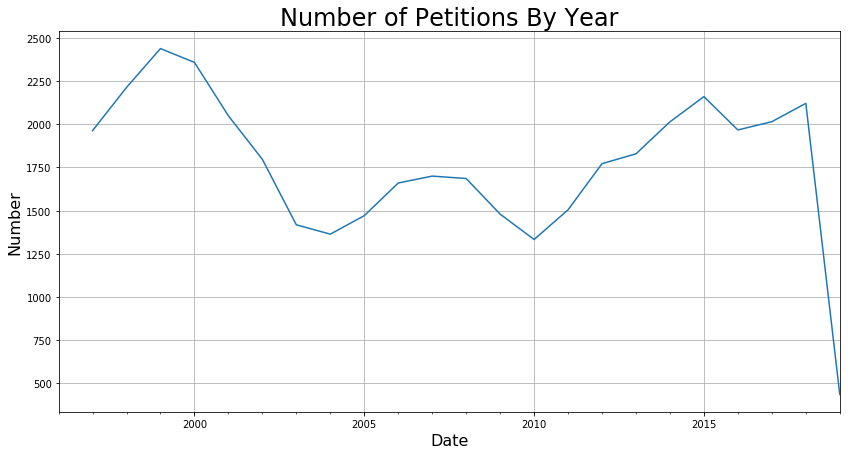

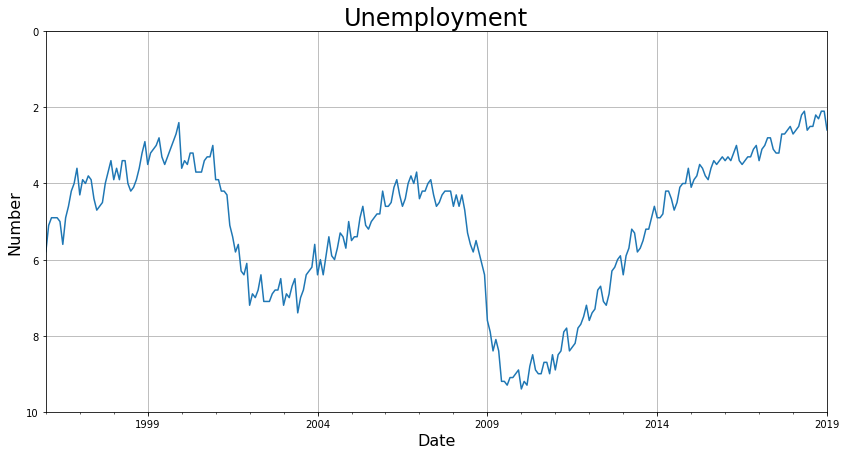

In [14]:
# Day
petition_day_count_df.plot(kind="line", color='#1f77b4', figsize = (14,7), legend = None)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Number', fontsize=16)
plt.title('Number of Petitions By Date', fontsize=24)
plt.grid(True)
plt.savefig("figures/eda/petitions-by-date.png", transparent=True, bbox_inches="tight")
plt.show()

# Week
petition_week_count_df.plot(kind="line", color='#1f77b4', figsize = (14,7), legend = None)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Number', fontsize=16)
plt.title('Number of Petitions By Date', fontsize=24)
plt.grid(True)
plt.savefig("figures/eda/petitions-by-week.png", transparent=True, bbox_inches="tight")
plt.show()

# Month
petition_month_count_df.plot(kind="line", color='#1f77b4', figsize = (14,7), legend = None)
plt.xlim(dt.datetime(1996, 1, 1), dt.datetime(2019, 1, 1))
plt.ylim(0, 250)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Number', fontsize=16)
plt.title('Number of Petitions By Month', fontsize=24)
plt.grid(True)
plt.savefig("figures/eda/petitions-by-month.png", transparent=True, bbox_inches="tight")
plt.show()

# Year
petition_year_count_df.plot(kind="line", color='#1f77b4', figsize = (14,7), legend = None)
plt.xlim(dt.datetime(1996, 1, 1), dt.datetime(2019, 1, 1))
plt.xlabel('Date', fontsize=16)
plt.ylabel('Number', fontsize=16)
plt.title('Number of Petitions By Year', fontsize=24)
plt.grid(True)
plt.savefig("figures/eda/petitions-by-year.png", transparent=True, bbox_inches="tight")
plt.show()

# Unemployment Month
unemployment_df.plot(kind="line", color='#1f77b4', figsize = (14,7), legend = None)
plt.xlim(dt.datetime(1996, 1, 1), dt.datetime(2019, 1, 1))
plt.ylim(10, 0)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Number', fontsize=16)
plt.title('Unemployment', fontsize=24)
plt.grid(True)
plt.savefig("figures/eda/unemployment-by-month.png", transparent=True, bbox_inches="tight")
plt.show()

# Neighborhood Number

In [ ]:
neighborhood_dict = {}

for i in range(1, 27):
    neighborhood_dict[i] = petition_df[['Neighborhood Number', 'Neighborhood Name']] \
        [petition_df['Neighborhood Number'] == i].mode()['Neighborhood Name'][0]

for i in range(28, 42):
    neighborhood_dict[i] = petition_df[['Neighborhood Number', 'Neighborhood Name']] \
        [petition_df['Neighborhood Number'] == i].mode()['Neighborhood Name'][0]

neighborhood_dict

<Figure size 576x360 with 0 Axes>

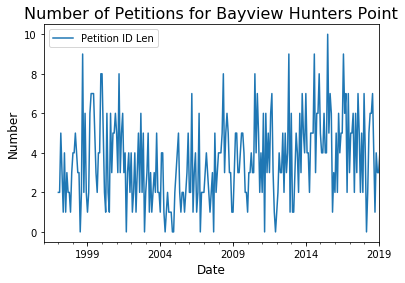

<Figure size 576x360 with 0 Axes>

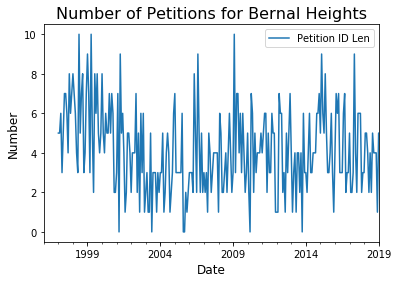

<Figure size 576x360 with 0 Axes>

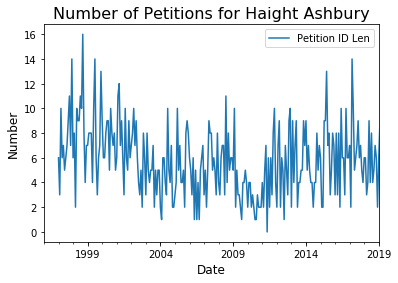

<Figure size 576x360 with 0 Axes>

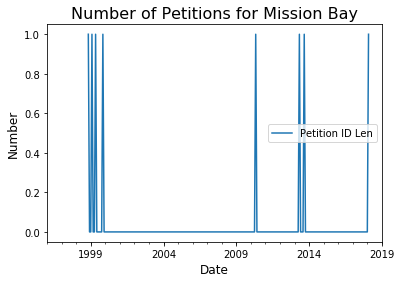

<Figure size 576x360 with 0 Axes>

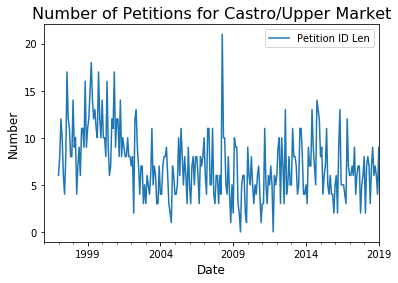

<Figure size 576x360 with 0 Axes>

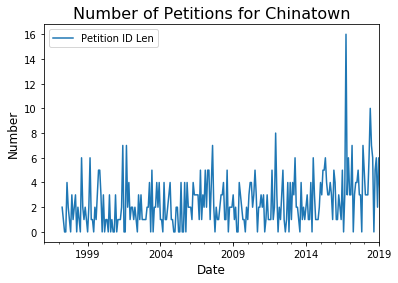

<Figure size 576x360 with 0 Axes>

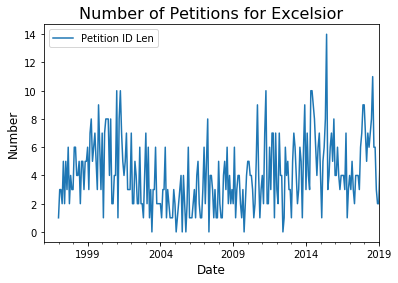

<Figure size 576x360 with 0 Axes>

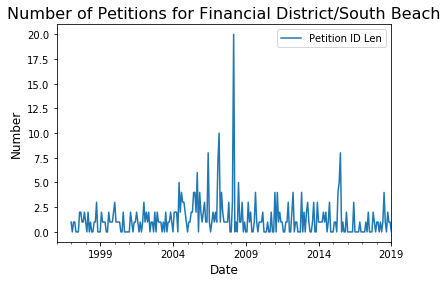

<Figure size 576x360 with 0 Axes>

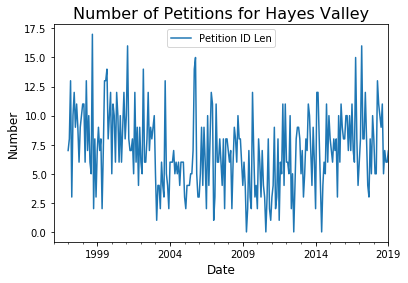

<Figure size 576x360 with 0 Axes>

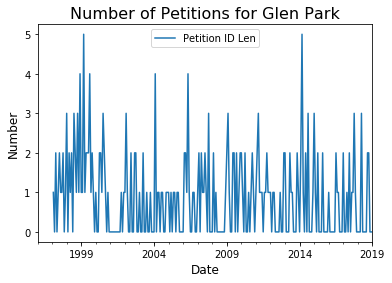

<Figure size 576x360 with 0 Axes>

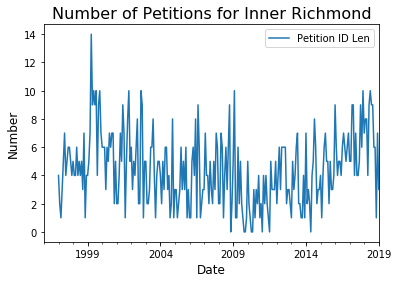

<Figure size 576x360 with 0 Axes>

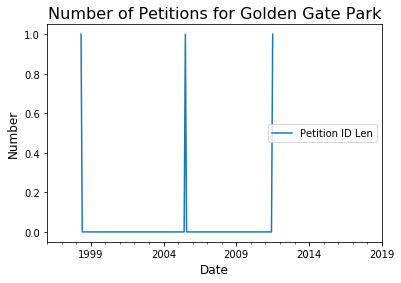

<Figure size 576x360 with 0 Axes>

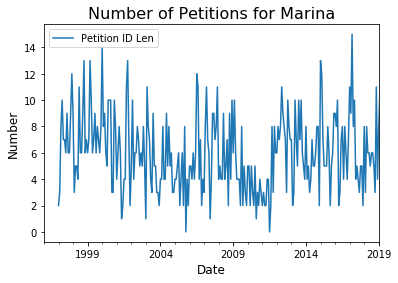

<Figure size 576x360 with 0 Axes>

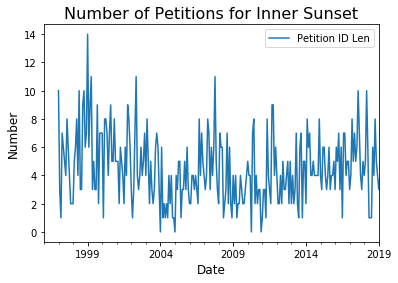

<Figure size 576x360 with 0 Axes>

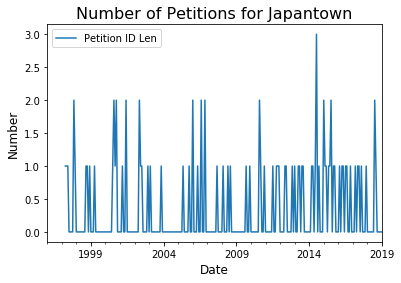

<Figure size 576x360 with 0 Axes>

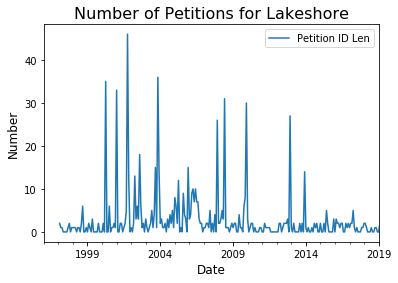

<Figure size 576x360 with 0 Axes>

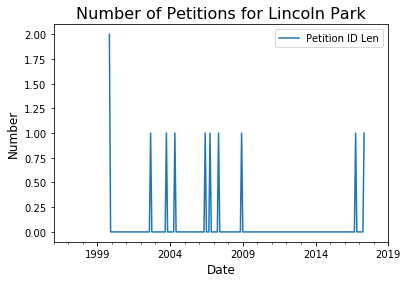

<Figure size 576x360 with 0 Axes>

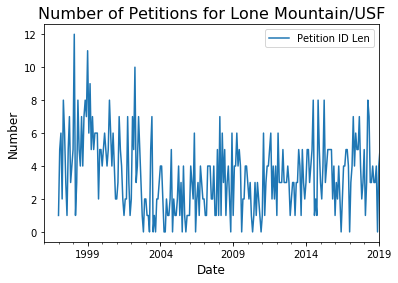

<Figure size 576x360 with 0 Axes>

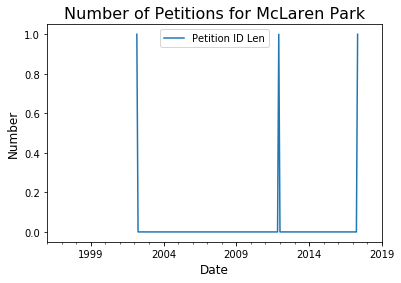

<Figure size 576x360 with 0 Axes>

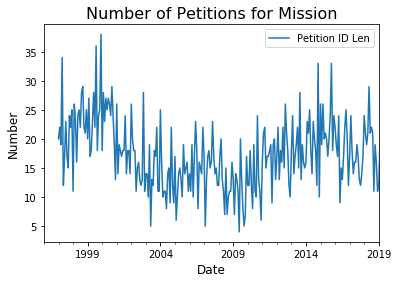

<Figure size 576x360 with 0 Axes>

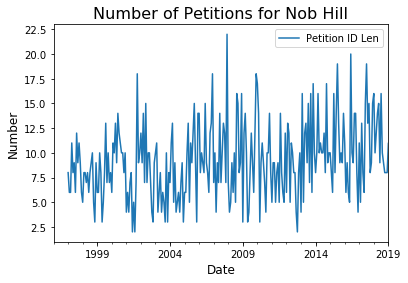

<Figure size 576x360 with 0 Axes>

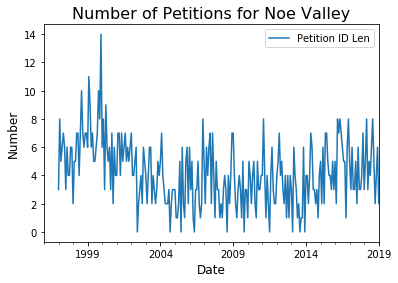

<Figure size 576x360 with 0 Axes>

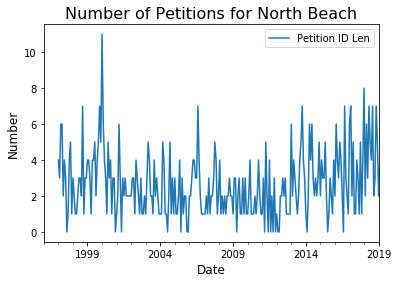

<Figure size 576x360 with 0 Axes>

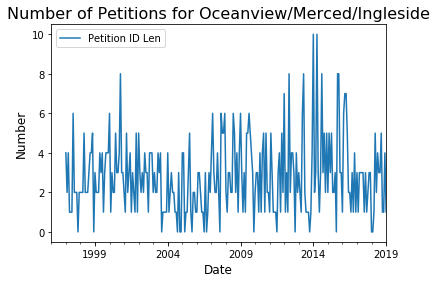

<Figure size 576x360 with 0 Axes>

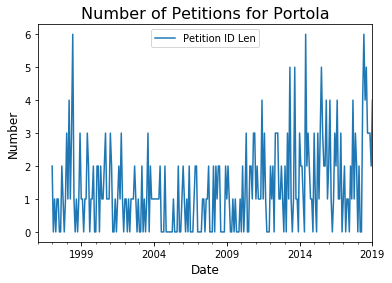

<Figure size 576x360 with 0 Axes>

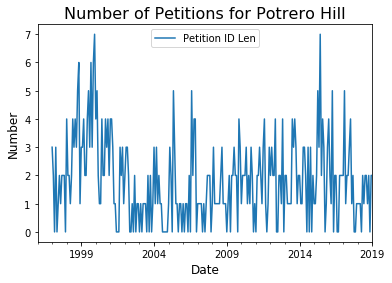

<Figure size 576x360 with 0 Axes>

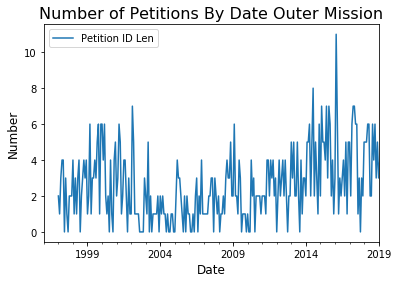

<Figure size 576x360 with 0 Axes>

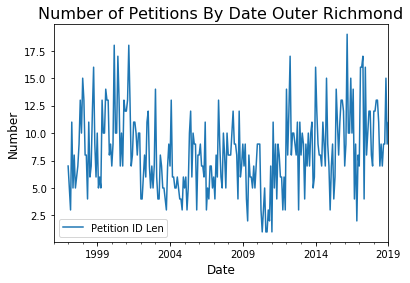

<Figure size 576x360 with 0 Axes>

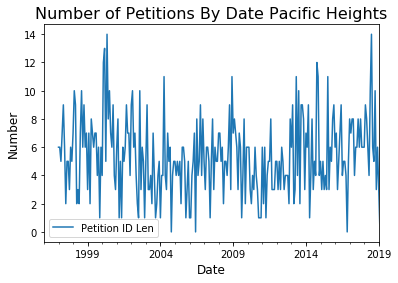

<Figure size 576x360 with 0 Axes>

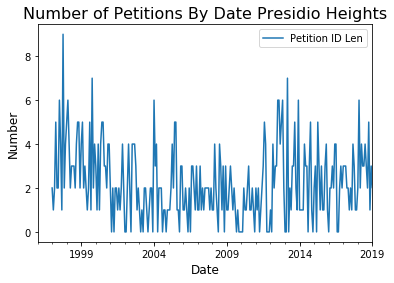

<Figure size 576x360 with 0 Axes>

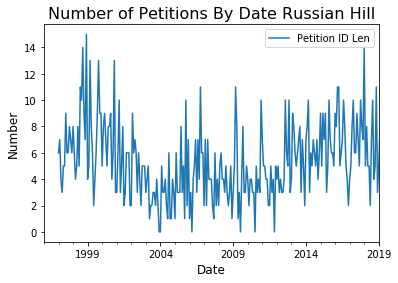

<Figure size 576x360 with 0 Axes>

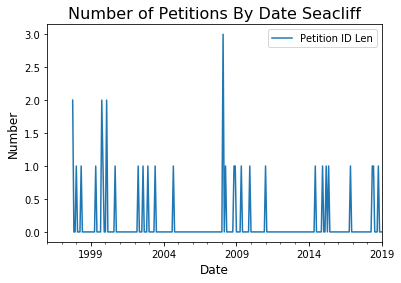

<Figure size 576x360 with 0 Axes>

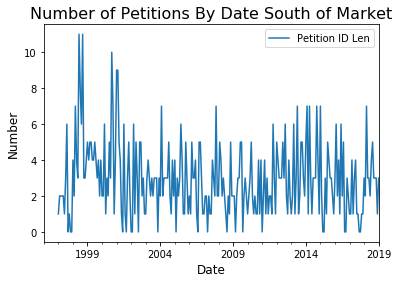

<Figure size 576x360 with 0 Axes>

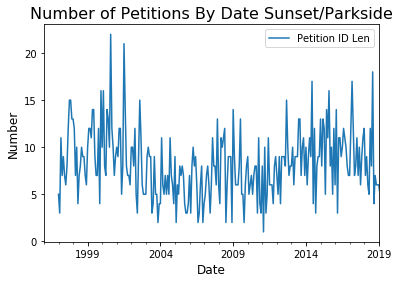

<Figure size 576x360 with 0 Axes>

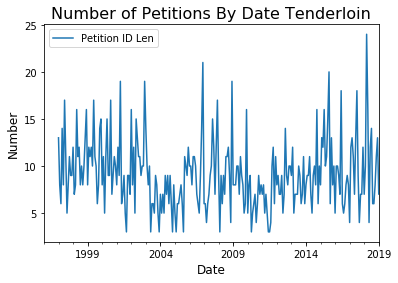

<Figure size 576x360 with 0 Axes>

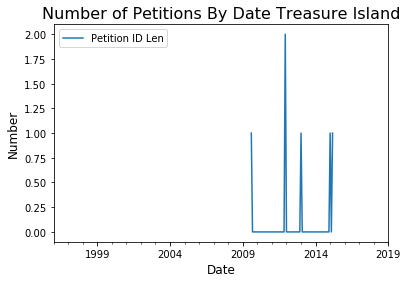

<Figure size 576x360 with 0 Axes>

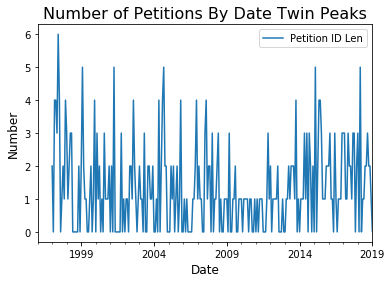

<Figure size 576x360 with 0 Axes>

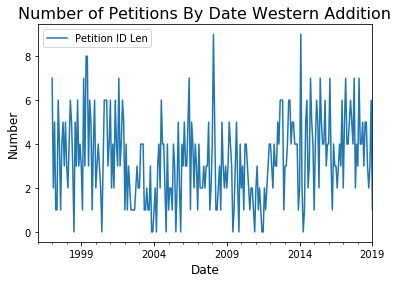

<Figure size 576x360 with 0 Axes>

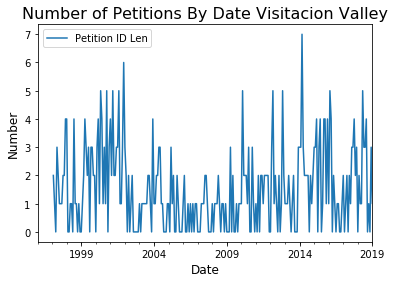

<Figure size 576x360 with 0 Axes>

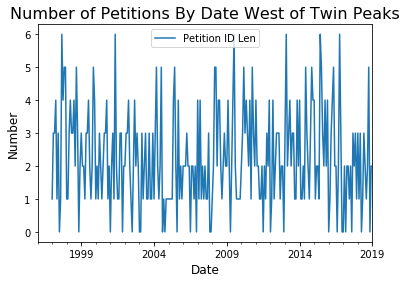

In [7]:
# Check distribution of data over time by neighborhood number one by one

for i in range(1, 27):
    plt.figure(figsize = (8,5))
    petition_df[petition_df['Neighborhood Number'] == i] \
        [['Petition ID Len', 'Datetime']] \
        .groupby(pd.TimeGrouper("M", key="Datetime")).count().plot(kind="line", color='#1f77b4')
    plt.xlim(dt.datetime(1996, 1, 1), dt.datetime(2019, 1, 1))
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Number', fontsize=12)
    plt.title('Number of Petitions for {}'.format(neighborhood_dict[i]), fontsize=16)
    #plt.savefig("Figures/Neighborhood/Number of Petitions for {}.png".format(i), transparent=True, bbox_inches="tight")
    
# Check distribution of data over time by neighborhood number
for i in range(28, 42):
    plt.figure(figsize = (8,5))
    petition_df[petition_df['Neighborhood Number'] == i] \
        [['Petition ID Len', 'Datetime']] \
        .groupby(pd.TimeGrouper("M", key="Datetime")).count().plot(kind="line", color='#1f77b4')
    plt.xlim(dt.datetime(1996, 1, 1), dt.datetime(2019, 1, 1))
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Number', fontsize=12)
    plt.title('Number of Petitions By Date {}'.format(neighborhood_dict[i]), fontsize=16)
    #plt.savefig("Figures/Neighborhood/Number of Petitions for {}.png".format(i), transparent=True, bbox_inches="tight")

In [8]:
# NA that has its own pattern
print(neighborhood_dict[16])

Lakeshore


In [9]:
# NAs that have bad data
print(neighborhood_dict[15])
print(neighborhood_dict[33])
print(neighborhood_dict[40])

Japantown
Seacliff
Visitacion Valley


# Get distribution of counts

In [10]:
petition_day_counts_df = pd.DataFrame(petition_day_count_df['Petition ID Len'].value_counts().sort_index())
petition_week_counts_df = pd.DataFrame(petition_week_count_df['Petition ID Len'].value_counts().sort_index())
petition_month_counts_df = pd.DataFrame(petition_month_count_df['Petition ID Len'].value_counts().sort_index())

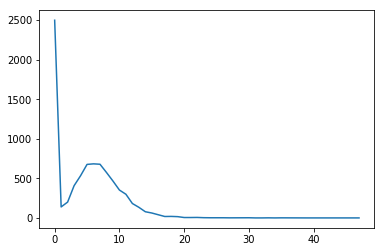

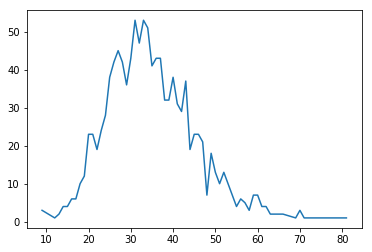

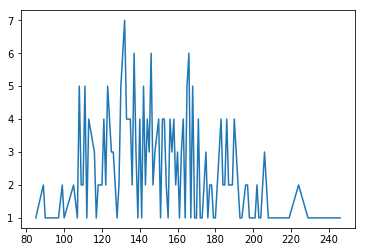

In [11]:
plt.plot(petition_day_counts_df)
plt.show()

plt.plot(petition_week_counts_df)
plt.show()

plt.plot(petition_month_counts_df)
plt.show()